QUE :- use feature (Age, EstimatedSalary) to classify the purchase for the data in purchase_logistic.csv using gaussian naive bayes classifier do use all required data pre processing do plot (display ) confusion matrix for a better display also print the confusion matrix report also find index of random_state where accuracy is maximum

SET - 2 ROLL NO. - 2025010064

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("purchase_logistic.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df = df.dropna()
df 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
X = df[['Age', 'EstimatedSalary']]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [22]:
best_acc = 0
best_state = None
for state in range(0, 201): 
   X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=state, shuffle=True)
X_test

,Age,EstimatedSalary
124,41,51000
383,49,28000
295,36,63000
204,58,101000
380,42,64000
...,...,...
254,50,44000
208,40,142000
235,46,79000
47,27,54000


In [8]:
X_train

,Age,EstimatedSalary
349,38,61000
121,37,72000
390,48,33000
140,19,85000
31,27,137000
...,...,...
298,45,79000
324,48,131000
272,60,42000
105,21,72000


In [23]:
y_train

349    0
121    0
390    1
140    0
31     1
      ..
298    0
324    1
272    1
105    0
282    1
Name: Purchased, Length: 300, dtype: int64

In [10]:
    model = GaussianNB()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > best_acc:
        best_acc = acc
        best_state = state
print("BEST ACCURACY :", best_acc)
print("BEST RANDOM STATE :", best_state)

BEST ACCURACY : 0.92
BEST RANDOM STATE : 200


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=best_state, shuffle=True)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [26]:
conmax = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:")
conmax

CONFUSION MATRIX:


array([[56,  3],
       [ 9, 32]])

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.94      0.85      0.89        40

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



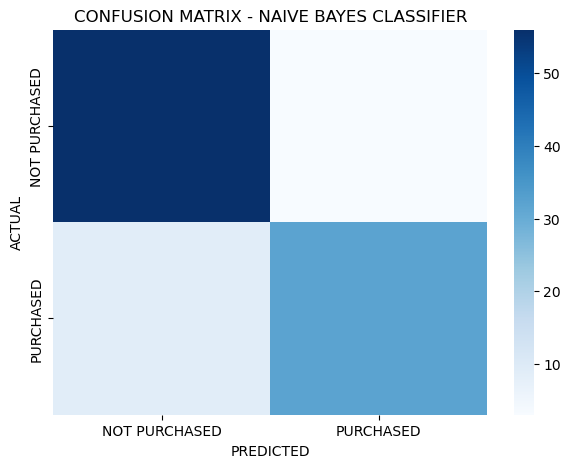

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues', xticklabels=['NOT PURCHASED', 'PURCHASED'], yticklabels=['NOT PURCHASED', 'PURCHASED'])
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title("CONFUSION MATRIX - NAIVE BAYES CLASSIFIER")
plt.show()